# Miscellaneous Data Exploration
### Information: Dataset of Russian and Ukrainian equipment losses during the 2022 Russian invasion of Ukraine, based on Oryx data (photo/video evidence only).
*The explorations are a bit random and date back to when I was just experimenting with pandas*

**Description of main features**:
- **Equipment**: Type of equipment (e.g., Tanks, Armoured Fighting Vehicles).
- **Model**: Specific model of the equipment (e.g., T-72A, BRM-1K).
- **Sub_model**: Additional specifications or variations of the equipment model.
- **Manufacturer**: Country or entity that produced the equipment (e.g., the Soviet Union, Russia).
- **Losses_total**: Total Number of  equipment losses recorded.
- **Abandoned, Captured, Damaged, Sunk...**: Number of  equipment left abandoned, captured, damaged...

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tools_old1 import *
from math import ceil

# 1 - Russian losses

In [2]:
data_russia_full = pd.read_csv("Dataset4_losses_russia.csv");
pd.set_option("display.max_columns", None);
pd.set_option('display.max_rows', 50);
data_russia_full

,equipment,model,sub_model,manufacturer,losses_total,abandoned,abandoned and destroyed,captured,captured and destroyed,captured and stripped,damaged,damaged and abandoned,damaged and captured,damaged beyond economical repair,damaged by Bayraktar TB2,destroyed,destroyed by Bayraktar TB2,destroyed by Bayraktar TB2 and Harpoon AShM,sunk
0,Tanks,T-62M,NaN,the Soviet Union,20,1.0,NaN,14.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN
1,Tanks,T-62MV,NaN,the Soviet Union,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2,Tanks,T-64A,NaN,the Soviet Union,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,Tanks,T-64BV,NaN,the Soviet Union,39,2.0,NaN,4.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,30.0,NaN,NaN,NaN
4,Tanks,T-72A,NaN,the Soviet Union,33,1.0,NaN,15.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,"Trucks, Vehicles and Jeeps",UAZ-23632-148-64 armed pickup truck,NaN,Russia,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
294,"Trucks, Vehicles and Jeeps",UAZ-394511 ‘Esaul’,NaN,Russia,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN
295,"Trucks, Vehicles and Jeeps",UAZ-515195 'Esaul',NaN,Russia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
296,"Trucks, Vehicles and Jeeps",(Unknown) truck,NaN,Russia,296,1.0,NaN,12.0,1.0,NaN,7.0,2.0,NaN,NaN,NaN,265.0,8.0,NaN,NaN


## Handling missing values

In [3]:
percent_missing = data_russia_full.isnull().sum() * 100 / len(data_russia_full)
missing_value_df = pd.DataFrame({'Column Name': data_russia_full.columns,
                                'Percent of NA': percent_missing})
missing_value_df

,Column Name,Percent of NA
equipment,equipment,0.000000
model,model,0.000000
sub_model,sub_model,97.315436
manufacturer,manufacturer,0.000000
losses_total,losses_total,0.000000
abandoned,abandoned,74.161074
abandoned and destroyed,abandoned and destroyed,94.295302
captured,captured,34.228188
captured and destroyed,captured and destroyed,97.651007
captured and stripped,captured and stripped,98.657718


In [4]:
data_russia = data_russia_full[['equipment', 'model', 'manufacturer', 'losses_total', 'captured', 'destroyed']]
data_russia

,equipment,model,manufacturer,losses_total,captured,destroyed
0,Tanks,T-62M,the Soviet Union,20,14.0,3.0
1,Tanks,T-62MV,the Soviet Union,3,1.0,1.0
2,Tanks,T-64A,the Soviet Union,2,NaN,2.0
3,Tanks,T-64BV,the Soviet Union,39,4.0,30.0
4,Tanks,T-72A,the Soviet Union,33,15.0,16.0
...,...,...,...,...,...,...
293,"Trucks, Vehicles and Jeeps",UAZ-23632-148-64 armed pickup truck,Russia,2,NaN,2.0
294,"Trucks, Vehicles and Jeeps",UAZ-394511 ‘Esaul’,Russia,5,NaN,3.0
295,"Trucks, Vehicles and Jeeps",UAZ-515195 'Esaul',Russia,1,NaN,1.0
296,"Trucks, Vehicles and Jeeps",(Unknown) truck,Russia,296,12.0,265.0


In [5]:
data_russia_full[pd.isnull(data_russia_full['captured'])].head(15)

,equipment,model,sub_model,manufacturer,losses_total,abandoned,abandoned and destroyed,captured,captured and destroyed,captured and stripped,damaged,damaged and abandoned,damaged and captured,damaged beyond economical repair,damaged by Bayraktar TB2,destroyed,destroyed by Bayraktar TB2,destroyed by Bayraktar TB2 and Harpoon AShM,sunk
2,Tanks,T-64A,NaN,the Soviet Union,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
18,Tanks,T-80UM2,NaN,Russia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
23,Tanks,Unknown tank,NaN,Russia,147,3.0,NaN,NaN,NaN,NaN,8.0,3.0,NaN,NaN,NaN,133.0,NaN,NaN,NaN
25,Armoured Fighting Vehicles,BRDM-2,NaN,the Soviet Union,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
31,Armoured Fighting Vehicles,Vityaz DT-10PM articulated tracked carrier,NaN,Russia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
33,Armoured Fighting Vehicles,GAZ-3344-20 'Aleut' articulated tracked carrier,NaN,Russia,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
38,Infantry Fighting Vehicles,BMP-1AM,NaN,Russia,16,2.0,NaN,NaN,1.0,NaN,1.0,1.0,2.0,NaN,NaN,9.0,NaN,NaN,NaN
42,Infantry Fighting Vehicles,Unknown BMP-1/2,NaN,the Soviet Union,70,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,65.0,NaN,NaN,NaN
44,Infantry Fighting Vehicles,BMO-T,NaN,Russia,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
51,Armoured Personnel Carriers,BTR-60PB,NaN,the Soviet Union,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_russia_full[pd.isnull(data_russia_full['destroyed'])].head(15)

,equipment,model,sub_model,manufacturer,losses_total,abandoned,abandoned and destroyed,captured,captured and destroyed,captured and stripped,damaged,damaged and abandoned,damaged and captured,damaged beyond economical repair,damaged by Bayraktar TB2,destroyed,destroyed by Bayraktar TB2,destroyed by Bayraktar TB2 and Harpoon AShM,sunk
14,Tanks,T-80BVK,NaN,the Soviet Union,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Tanks,T-80UK,NaN,Russia,3,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Armoured Fighting Vehicles,2S1 with ZU-23 AA gun,NaN,the Soviet Union,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Infantry Fighting Vehicles,BMP-2 675-sb3KDZ,NaN,Russia,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Infantry Fighting Vehicles,BMD-2,with RP-377VM1 jammer,the Soviet Union,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Infantry Fighting Vehicles,BMD-4M,with RP-337VM1 jammer,Russia,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Armoured Personnel Carriers,BTR-60PB,NaN,the Soviet Union,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Armoured Personnel Carriers,Ural-4320VV,NaN,Russia,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Infantry Mobility Vehicles,AMN-590951 multipurpose armored vehicle,NaN,Russia,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Command Posts And Communications Stations,BTR-60PU-12M air defence command vehicle,NaN,the Soviet Union,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The sum of all columns like “abandoned” “captured” “captured and destroyed” “damaged” is always equal to the losses_total column, even when the value of “abandoned” or “captured” is missing.
So here NaN doesn't really mean that the value is unknown, but rather that it's zero.
- We can therefore replace null values by 0

In [7]:
data_russia = data_russia.fillna(0)
data_russia_full = data_russia_full.fillna(0)

## Splitting features into categorical and numerical lists

In [8]:
cat_col = list(data_russia.select_dtypes('O').columns)
num_col = list(data_russia.select_dtypes(np.number).columns)
for i in cat_col:
    print(i,data_russia[i].unique(),sep=':\n',end='\n\n')

equipment:
['Tanks' 'Armoured Fighting Vehicles' 'Infantry Fighting Vehicles'
 'Armoured Personnel Carriers' 'Mine-Resistant Ambush Protected'
 'Infantry Mobility Vehicles' 'Command Posts And Communications Stations'
 'Engineering Vehicles And Equipment'
 'Self-Propelled Anti-Tank Missile Systems' 'Heavy Mortars'
 'Artillery Support Vehicles And Equipment' 'Towed Artillery'
 'Self-Propelled Artillery' 'Multiple Rocket Launchers'
 'Anti-Aircraft Guns' 'Self-Propelled Anti-Aircraft Guns'
 'Surface-To-Air Missile Systems' 'Radars' 'Jammers And Deception Systems'
 'Aircraft' 'Helicopters' 'Unmanned Aerial Vehicles' 'Naval Ships'
 'Logistics Trains' 'Trucks, Vehicles and Jeeps']

model:
['T-62M' 'T-62MV' 'T-64A' 'T-64BV' 'T-72A' 'T-72AV' 'T-72B'
 'T-72B Obr. 1989' 'T-72BA' 'T-72B3' 'T-72B3 Obr. 2014' 'T-72B3 Obr. 2016'
 'Unknown T-72' 'T-80BV' 'T-80BVK' 'T-80U' 'T-80UK' 'T-80UE-1' 'T-80UM2'
 'T-80BVM' 'Unknown T-80' 'T-90A' 'T-90M' 'Unknown tank'
 'BRM-1K reconnaissance vehicle' 'BRDM-2' 'M

## Delete rows regarding non-land vehicles

In [9]:
data_russia = data_russia[~data_russia.equipment.isin(['Aircraft','Helicopters',"Unmanned Aerial Vehicles","Naval Ships"])]
data_russia_full = data_russia_full[~data_russia_full.equipment.isin(['Aircraft','Helicopters',"Unmanned Aerial Vehicles","Naval Ships"])]

## Convert data type if necessary

In [10]:
data_russia.dtypes

equipment        object
model            object
manufacturer     object
losses_total      int64
captured        float64
destroyed       float64
dtype: object

In [11]:
data_russia['captured'] = data_russia['captured'].astype(np.int64)
data_russia['destroyed'] = data_russia['destroyed'].astype(np.int64)

## Statistical visualisations

In [12]:
data_russia[cat_col].head()

,equipment,model,manufacturer
0,Tanks,T-62M,the Soviet Union
1,Tanks,T-62MV,the Soviet Union
2,Tanks,T-64A,the Soviet Union
3,Tanks,T-64BV,the Soviet Union
4,Tanks,T-72A,the Soviet Union


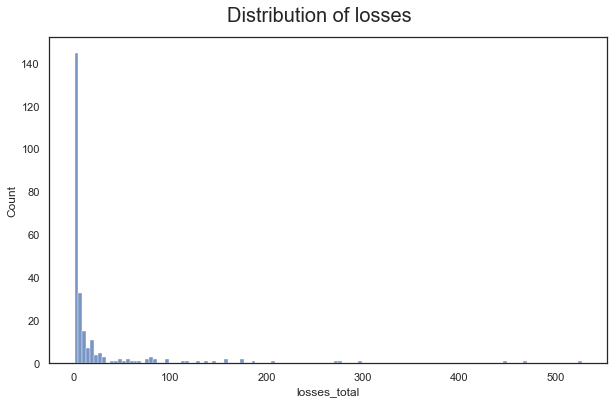

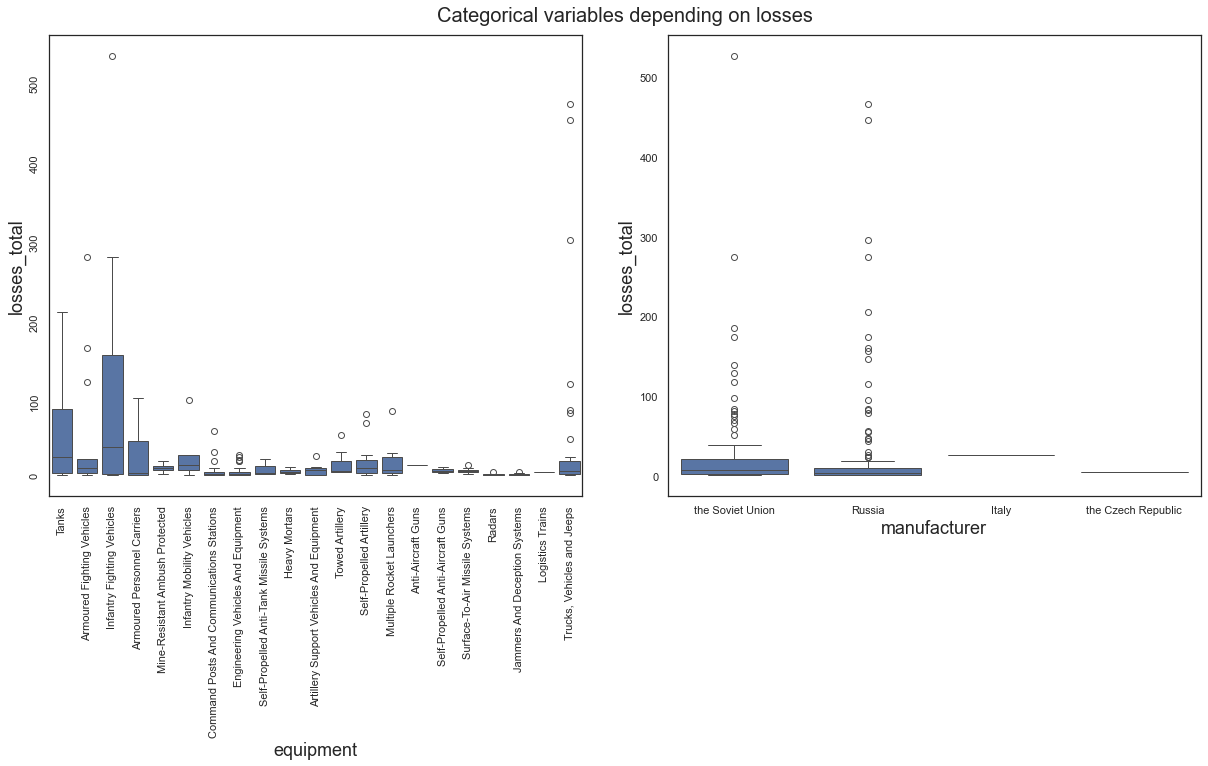

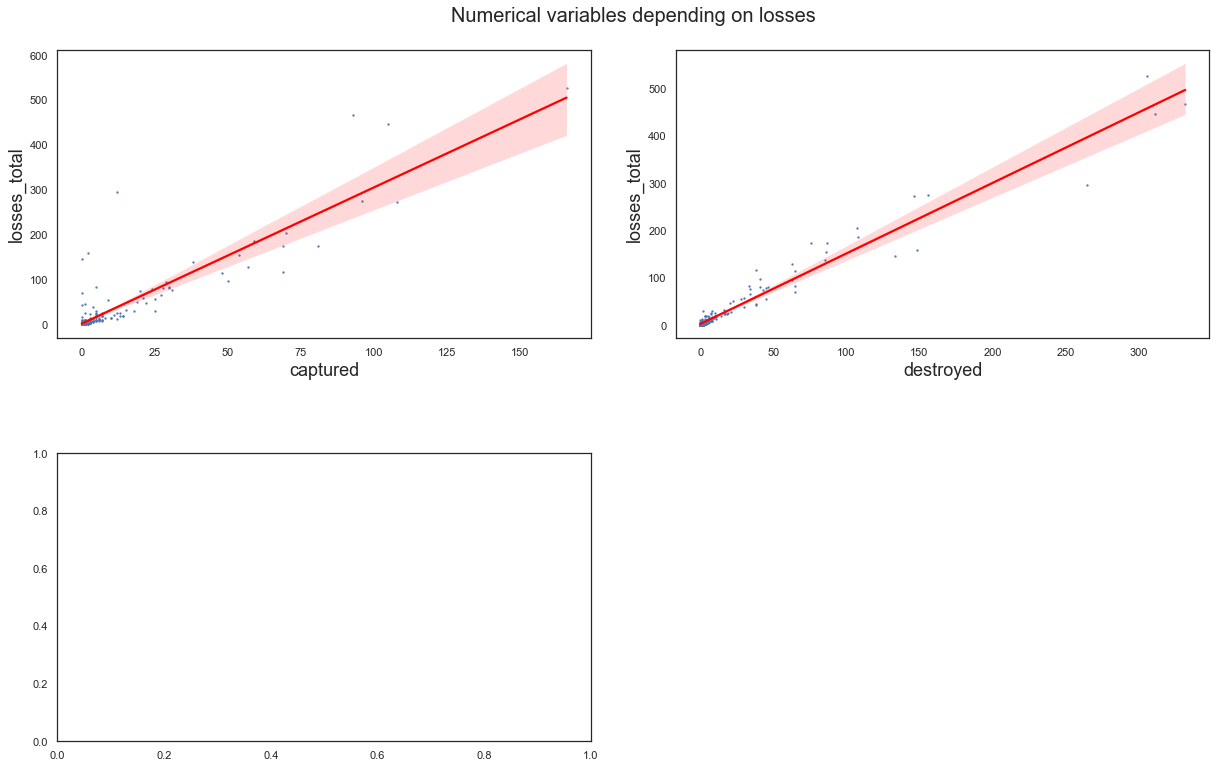

In [13]:
fig1 = y_distribution(data_russia, "losses_total")
fig1.suptitle("Distribution of losses", fontsize=20, y=0.95)
fig2 = cat_plot(data_russia, cat_col, "losses_total", "regression")
fig2.suptitle("Categorical variables depending on losses", fontsize=20, y=0.95)
fig3 = num_plot(data_russia, num_col, "losses_total", "regression")
fig3.suptitle("Numerical variables depending on losses", fontsize=20, y=0.95)
plt.show()
#to display other columns replace data_russia with data_russia_full

Dimensions:  (259, 6)


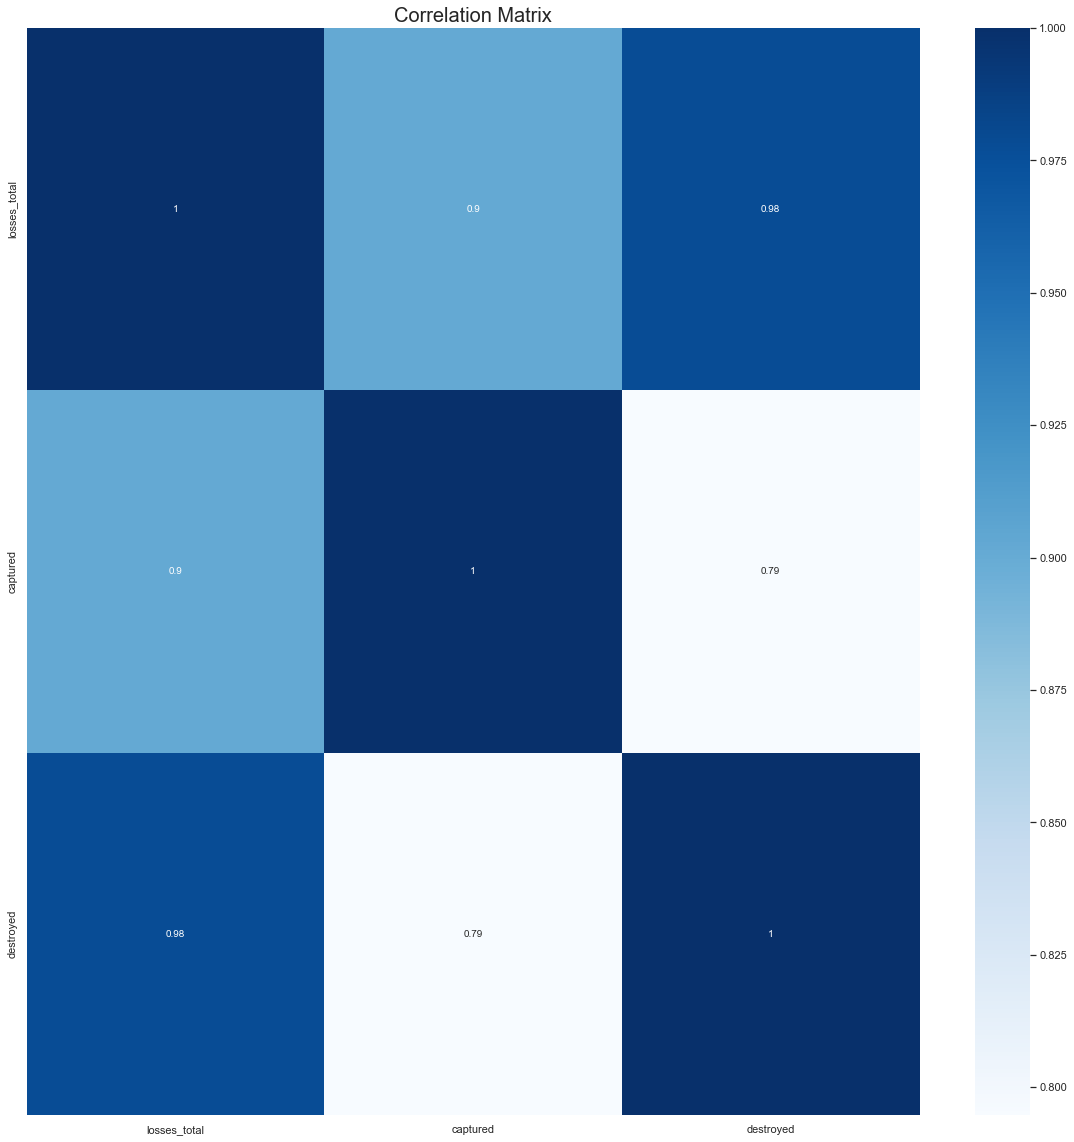

In [16]:
print('Dimensions: ', data_russia.shape)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(data=data_russia[num_col].corr(),cmap='Blues',annot=True, ax=ax)
plt.show()


## Most captured / destroyed vehicles

In [17]:
print("Top 5 of most captured vehicles")
somme_captures = {}
for x in data_russia['equipment'].unique():
    somme_captures[x] = data_russia[data_russia['equipment'] == x]['captured'].sum()
captures_df = pd.DataFrame.from_dict(somme_captures, orient='index', columns=['Number of captures'])
captures_df.index.name = "vehicle"
captures_df.sort_values(['Number of captures'], ascending=False).head(5)

Top 5 of most captured vehicles


,Number of captures
vehicle,
Infantry Fighting Vehicles,439
Tanks,416
"Trucks, Vehicles and Jeeps",391
Armoured Fighting Vehicles,197
Self-Propelled Artillery,90


In [18]:
print("Top 5 of most destroyed vehicles")
somme_destructions = {}
for x in data_russia['equipment'].unique():
    somme_destructions[x] = data_russia[data_russia['equipment'] == x]['destroyed'].sum()
destructions_df = pd.DataFrame.from_dict(somme_destructions, orient='index', columns=['Number of destructions'])
destructions_df.index.name = "vehicle"
destructions_df.sort_values(['Number of destructions'], ascending=False).head(5)

Top 5 of most destroyed vehicles


,Number of destructions
vehicle,
"Trucks, Vehicles and Jeeps",1235
Infantry Fighting Vehicles,848
Tanks,726
Armoured Fighting Vehicles,377
Armoured Personnel Carriers,117


In [19]:
print("Top 5 of vehicles with highest ratio of capture")
ratio_captures = {}
for x in data_russia['equipment'].unique():
    ratio_captures[x] = data_russia[data_russia['equipment'] == x]['captured'].sum() / data_russia[data_russia['equipment'] == x]['losses_total'].sum() * 100
captures_df2 = pd.DataFrame.from_dict(ratio_captures, orient='index', columns=['Percent of capture'])
captures_df2.index.name = "vehicle"
captures_df2.sort_values(['Percent of capture'], ascending=False).head(5)

Top 5 of vehicles with highest ratio of capture


,Percent of capture
vehicle,
Anti-Aircraft Guns,71.428571
Heavy Mortars,56.521739
Radars,56.250000
Towed Artillery,52.293578
Artillery Support Vehicles And Equipment,48.437500


## T-27B tank losses

In [20]:
tankdf = data_russia_full[data_russia_full['model'] == 'T-72B'][['abandoned','captured','captured and destroyed', 'captured and stripped', 'damaged', 'damaged and abandoned','damaged and captured', 'destroyed']]
tankdf

,abandoned,captured,captured and destroyed,captured and stripped,damaged,damaged and abandoned,damaged and captured,destroyed
6,3.0,59.0,2.0,1.0,4.0,4.0,5.0,108.0


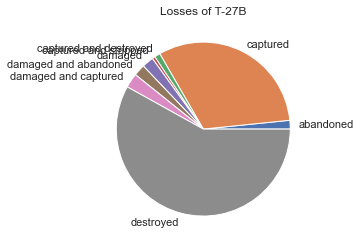

In [21]:
plt.title("Losses of T-27B")
plt.pie(tankdf.squeeze().values, labels=tankdf.columns.to_list())
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

## Ratios between vehicles manufactured by Russia/USSR

In [22]:
urss = data_russia_full[data_russia_full['manufacturer'] == "the Soviet Union"]
russia = data_russia_full[data_russia_full['manufacturer'] == 'Russia']
comparaison_dict = {}
pertes_urss = urss['losses_total'].sum()
pertes_russia = russia['losses_total'].sum()
for x in ['captured','abandoned','destroyed']:
    comparaison_dict[x] = [urss[x].sum() / pertes_urss, russia[x].sum() / pertes_russia]
comparaison_df = pd.DataFrame(comparaison_dict, index=['URSS','Russia'])
comparaison_df

,captured,abandoned,destroyed
URSS,0.360622,0.047668,0.524007
Russia,0.262503,0.030819,0.635577


# 2 - Ukrainian Losses

### Same few initial processes as for russian losses...

In [23]:
data_ukraine_full = pd.read_csv("Dataset4_losses_ukraine.csv")
data_ukraine_full

,equipment,model,sub_model,manufacturer,losses_total,abandoned,abandoned and destroyed,captured,captured and destroyed,damaged,damaged and abandoned,damaged and captured,damaged beyond economical repair,damaged by Forpost-R,damaged by Orion and captured,destroyed,destroyed by Forpost-R,destroyed by Orion,destroyed by loitering munition,scuttled to prevent capture by Russia,sunk,sunk but raised by Russia
0,Tanks,T-64A,NaN,the Soviet Union,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tanks,T-64B,NaN,the Soviet Union,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Tanks,T-64BV,NaN,the Soviet Union,123,3.0,NaN,41.0,8.0,3.0,1.0,4.0,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Tanks,T-64BV Zr. 2017,NaN,Ukraine,49,3.0,NaN,27.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Tanks,T-64B1M,NaN,Ukraine,4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,"Trucks, Vehicles and Jeeps",Ford Ranger,NaN,the United States,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,"Trucks, Vehicles and Jeeps",Peugeot P4,NaN,France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
226,"Trucks, Vehicles and Jeeps",Unknown truck,NaN,Ukraine,52,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,46.0,NaN,2.0,NaN,NaN,NaN,NaN
227,"Trucks, Vehicles and Jeeps",Unknown truck,with ZU-23 AA gun,Ukraine,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
percent_missing = data_ukraine_full.isnull().sum() * 100 / len(data_ukraine_full)
missing_value_df = pd.DataFrame({'Nom de colonne': data_ukraine_full.columns,
                                'Percent of NA': percent_missing})
missing_value_df.sort_values(by='Percent of NA', ascending=True)

,Nom de colonne,Percent of NA
equipment,equipment,0.000000
model,model,0.000000
manufacturer,manufacturer,0.000000
losses_total,losses_total,0.000000
destroyed,destroyed,31.877729
captured,captured,41.484716
damaged,damaged,84.279476
abandoned,abandoned,89.519651
sub_model,sub_model,89.956332
damaged and captured,damaged and captured,91.266376


In [25]:
data_ukraine = data_ukraine_full[['equipment', 'model', 'manufacturer', 'losses_total', 'captured', 'destroyed']]

In [26]:
data_ukraine = data_ukraine.fillna(0)
data_ukraine_full = data_ukraine_full.fillna(0)

In [27]:
cat_col = list(data_ukraine.select_dtypes('O').columns)
num_col = list(data_ukraine.select_dtypes(np.number).columns)
for i in cat_col:
    print(i,data_ukraine[i].unique(),sep=':\n',end='\n\n')

equipment:
['Tanks' 'Armoured Fighting Vehicles' 'Infantry Fighting Vehicles'
 'Armoured Personnel Carriers' 'Mine-Resistant Ambush Protected'
 'Infantry Mobility Vehicles' 'Command Posts And Communications Stations'
 'Engineering Vehicles And Equipment'
 'Self-Propelled Anti-Tank Missile Systems'
 'Artillery Support Vehicles And Equipment' 'Towed Artillery'
 'Self-Propelled Artillery' 'Multiple Rocket Launchers'
 'Anti-Aircraft Guns' 'Self-Propelled Anti-Aircraft Guns'
 'Surface-To-Air Missile Systems' 'Radars And Communications Equipment'
 'Jammers And Deception Systems' 'Aircraft' 'Helicopters'
 'Unmanned Aerial Vehicles' 'Naval Ships' 'Trucks, Vehicles and Jeeps']

model:
['T-64A' 'T-64B' 'T-64BV' 'T-64BV Zr. 2017' 'T-64B1M' "T-64BM 'Bulat'"
 "T-64BM2 'Bulat'" 'Unknown T-64' "T-72 'Ural'" 'T-72M/M1(R)' 'T-72AV'
 'T-72B' 'T-72AMT' 'T-80BV' 'Unknown tank' 'BRM-1K reconnaissance vehicle'
 'BRDM-2' 'Vepr' 'MT-LB' 'MT-LB with ZU-23 AA gun'
 'BTS-4 ARV with ZU-23 AA gun' 'MT-LBu' 'MT-LB-

In [28]:
data_ukraine = data_ukraine[~data_ukraine.equipment.isin(['Aircraft','Helicopters',"Unmanned Aerial Vehicles","Naval Ships"])]
data_ukraine_full = data_ukraine_full[~data_ukraine_full.equipment.isin(['Aircraft','Helicopters',"Unmanned Aerial Vehicles","Naval Ships"])]

In [29]:
data_ukraine.dtypes

equipment        object
model            object
manufacturer     object
losses_total      int64
captured        float64
destroyed       float64
dtype: object

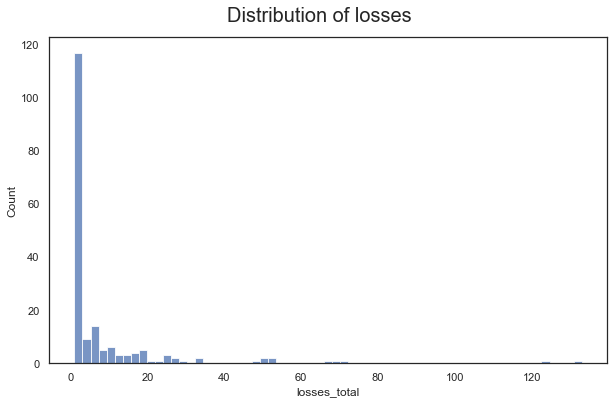

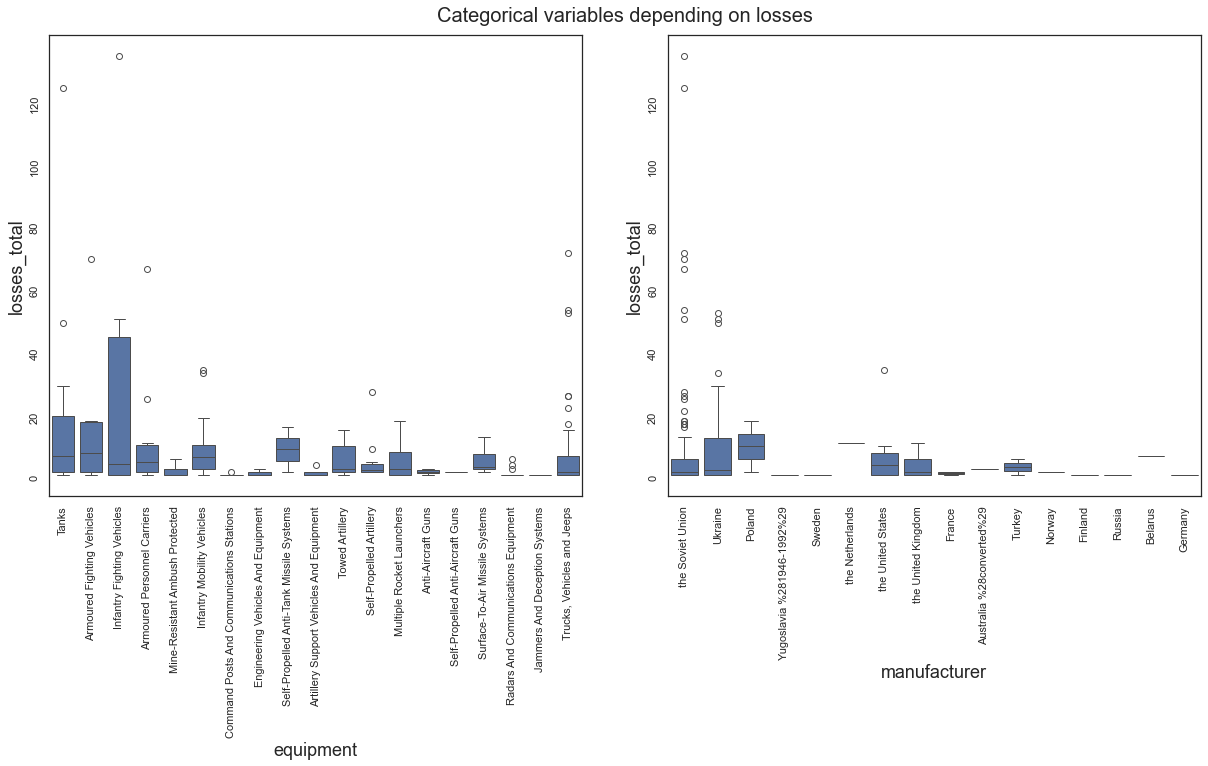

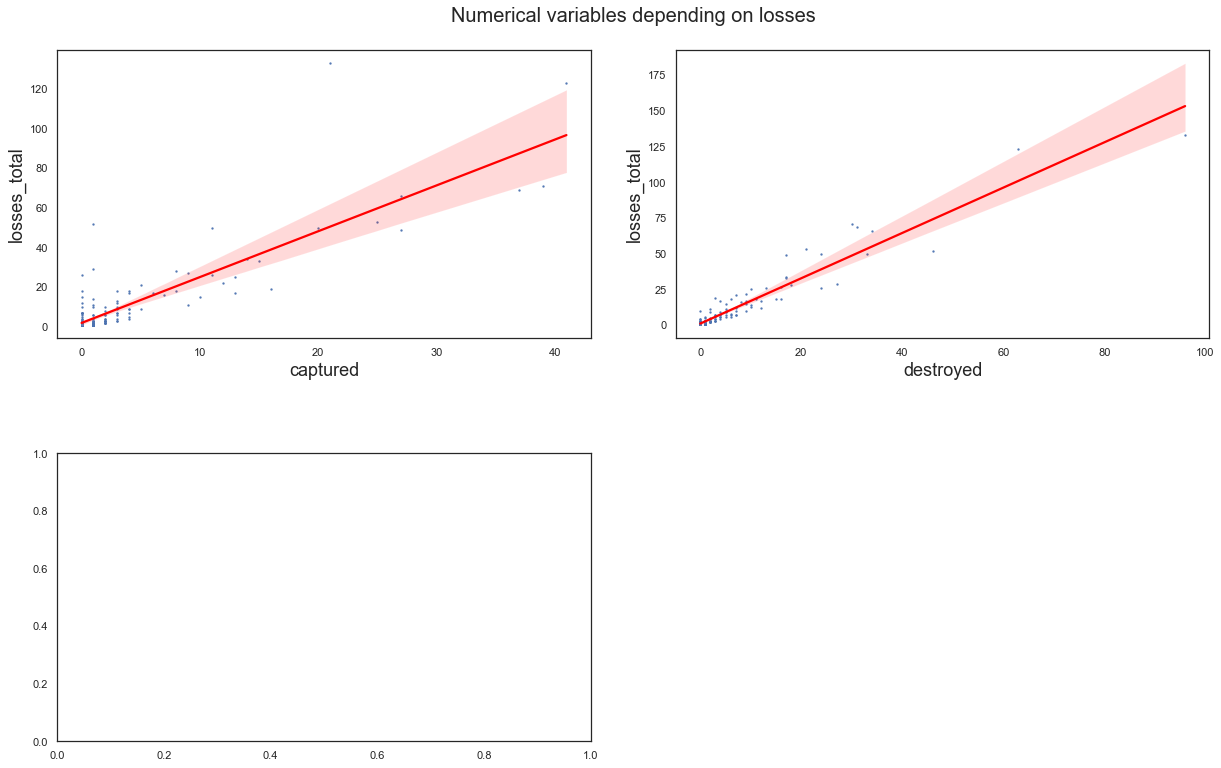

In [30]:
fig1 = y_distribution(data_ukraine_full, "losses_total")
fig1.suptitle("Distribution of losses", fontsize=20, y=0.95)
fig2 = cat_plot(data_ukraine_full, cat_col, "losses_total", "regression")
fig2.suptitle("Categorical variables depending on losses", fontsize=20, y=0.95)
fig3 = num_plot(data_ukraine_full, num_col, "losses_total", "regression")
fig3.suptitle("Numerical variables depending on losses", fontsize=20, y=0.95)
plt.show()
#pour afficher les autres colonnes remplacer data_ukraine par data_ukraine_full

## 3 - Comparison of Russia and Ukraine

### Ratio of manufactures in own country

In [31]:
russian_ratio = data_russia[data_russia["manufacturer"] == 'Russia']['losses_total'].sum() / data_russia['losses_total'].sum()
ukrainian_ratio = data_ukraine[data_ukraine["manufacturer"] == 'Ukraine']['losses_total'].sum() / data_ukraine['losses_total'].sum()
print("Ratio of russian manufactures: ", russian_ratio)
print("Ratio of ukrainian manufactures: ", ukrainian_ratio)
print("Ratio of ", round(russian_ratio / ukrainian_ratio * 100), "%")

Ratio of russian manufactures:  0.5583396226415094
Ratio of ukrainian manufactures:  0.29640900791235547
Ratio of  188 %


### Comparison of Russian and Ukrainian losses

In [32]:
russian_losses = data_russia['losses_total'].sum()
ukrainian_losses = data_ukraine['losses_total'].sum()
print("Number of russian losses: ", russian_losses)
print("Number of ukrainian losses: ", ukrainian_losses)
print("Ratio of ", round(russian_losses / ukrainian_losses * 100), "%")

Number of russian losses:  6625
Number of ukrainian losses:  1643
Ratio of  403 %


### Loss of joint vehicles between Russia and Ukraine

Russian and Ukrainian losses by vehicle


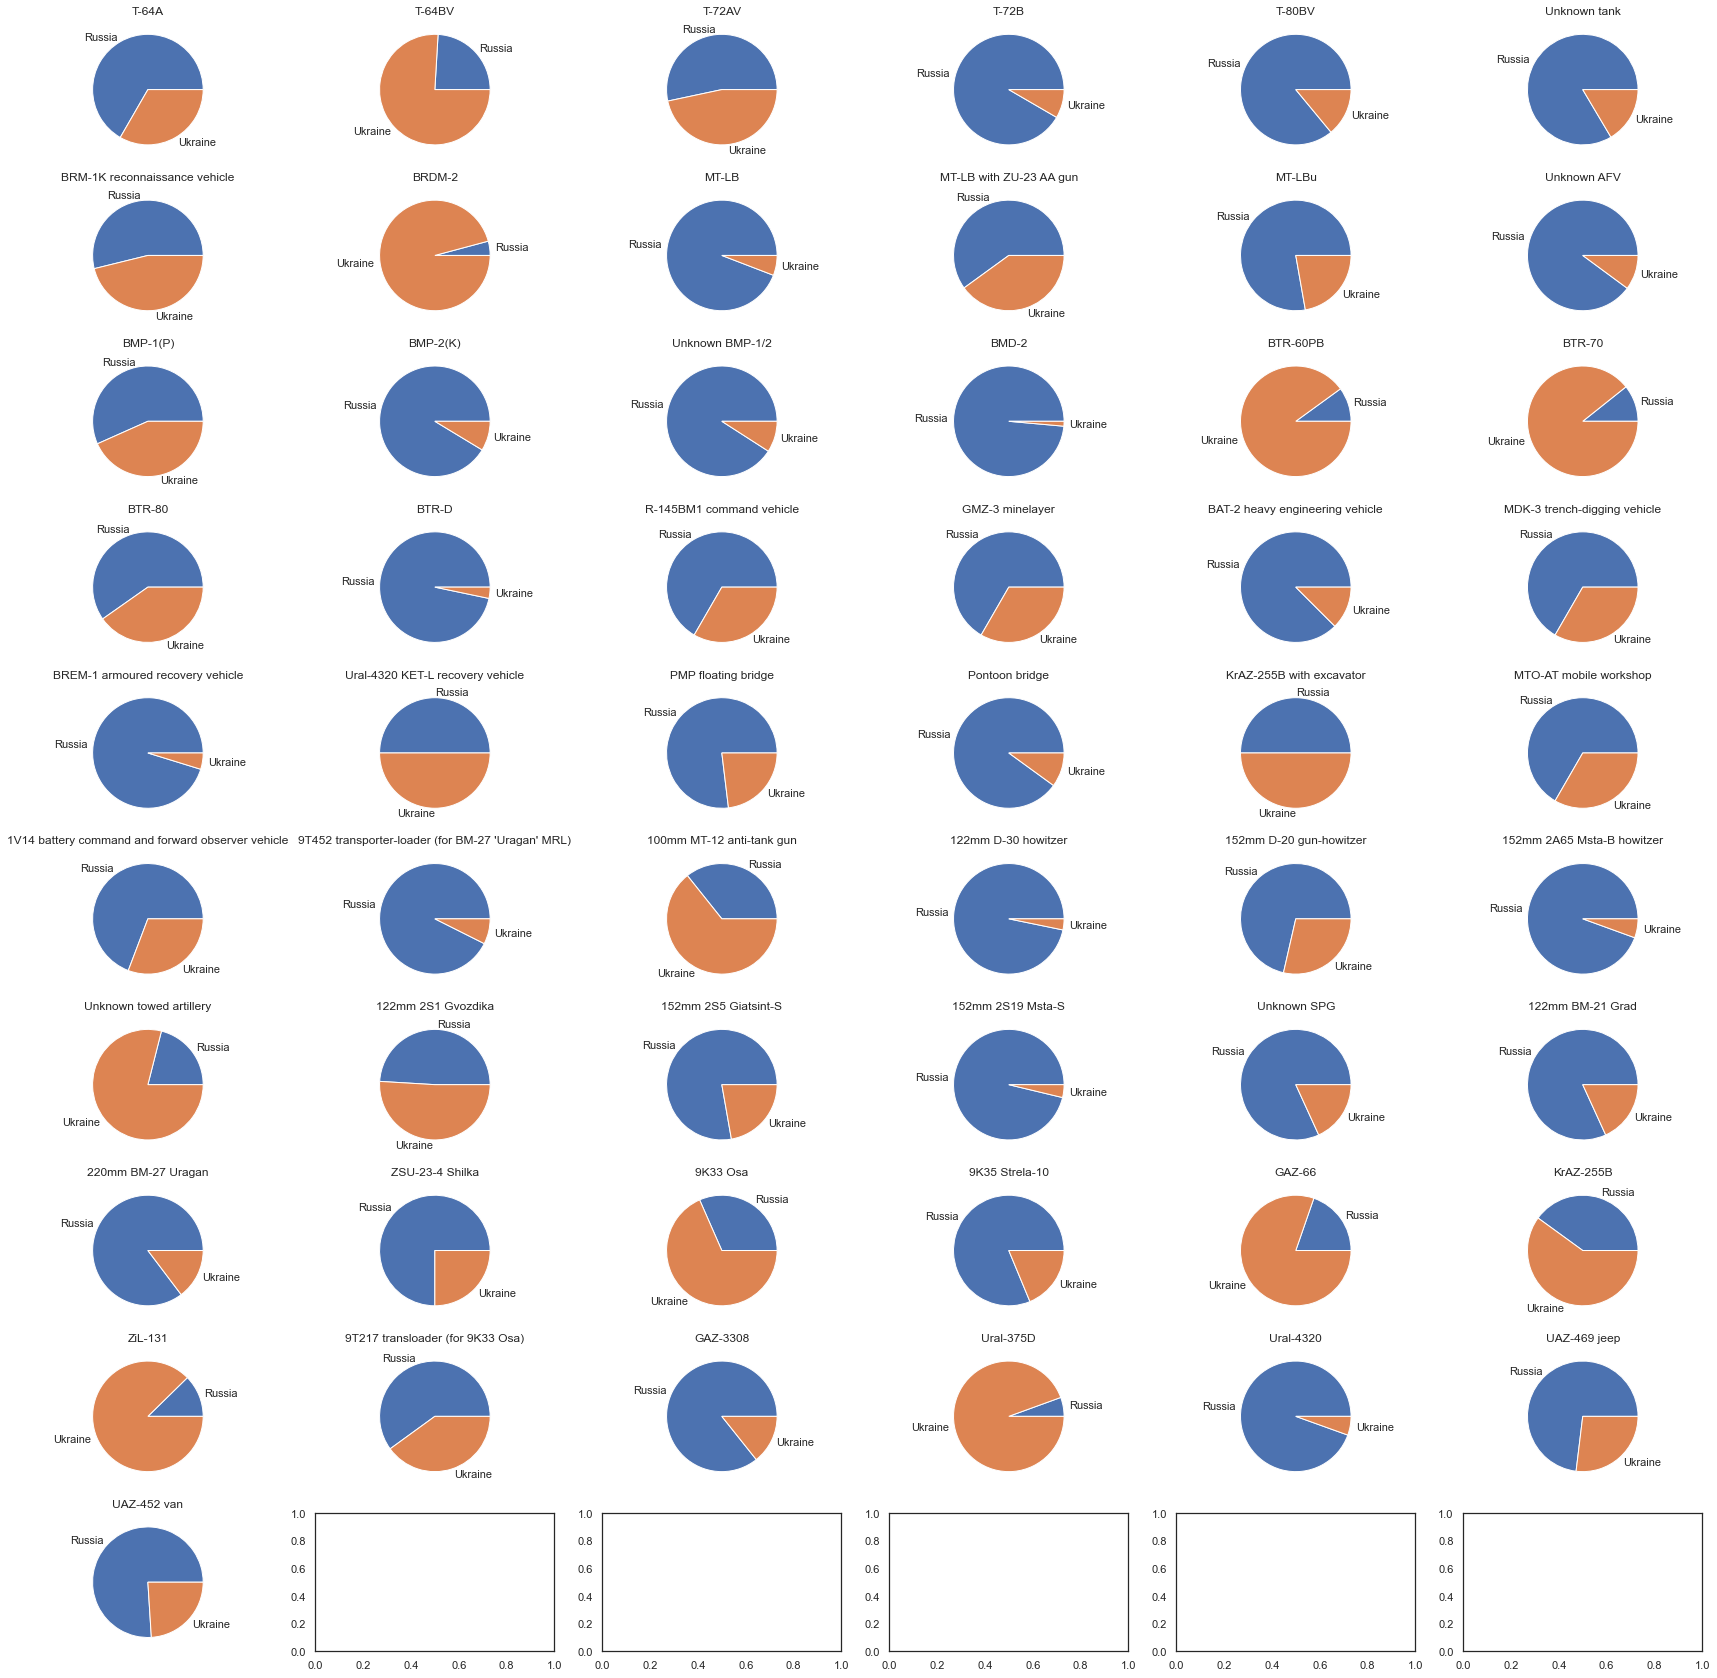

In [33]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
print("Russian and Ukrainian losses by vehicle")
overlap = [i for i in data_russia['model'].unique() if i in data_ukraine['model'].unique()]
fig, axes = plt.subplots(nrows=ceil(len(overlap)/6), ncols=6, figsize=(30,30))
axs = axes.flatten()
for i in range(0, len(overlap)):
    axs[i].set_title(overlap[i])
    # modeldf = modeldf.append({"Pertes":data_russia[data_russia['model'] == overlap[i]]['losses_total'].iloc[0], "Pays":"Russia"}, ignore_index=True)
    # modeldf = modeldf.append({"Pertes":data_ukraine[data_ukraine['model'] == overlap[i]]['losses_total'].iloc[0], "Pays":"Ukraine"}, ignore_index=True)
    # print(modeldf)
    # axs[i] = sns.countplot(data=modeldf, x="Pertes", hue="Pays", ax=axs[i])
    axs[i].pie([data_russia[data_russia['model'] == overlap[i]]['losses_total'].iloc[0], data_ukraine[data_ukraine['model'] == overlap[i]]['losses_total'].iloc[0]], labels=["Russia","Ukraine"])

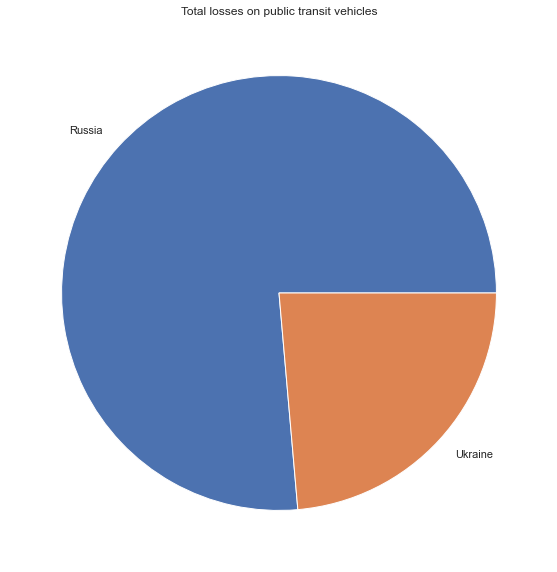

In [34]:
plt.title("Total losses on public transit vehicles")
pertes_russia = 0
pertes_ukraine = 0
for i in range(0, len(overlap)):
    pertes_russia += data_russia[data_russia['model'] == overlap[i]]['losses_total'].iloc[0]
    pertes_ukraine += data_ukraine[data_ukraine['model'] == overlap[i]]['losses_total'].iloc[0]
plt.pie([pertes_russia, pertes_ukraine], labels=["Russia","Ukraine"])
plt.show()